In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA

In [184]:
train_noisy = pd.read_csv('Train.csv').to_numpy()
test_noisy = pd.read_csv('Test.csv').to_numpy()

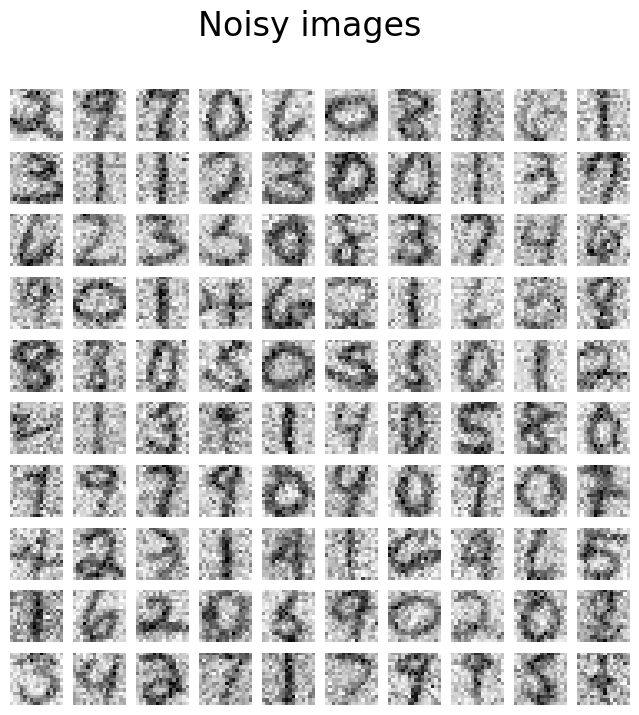

In [185]:
def plot_digits(X, title):
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap='Greys')
        ax.axis("off")
    fig.suptitle(title, fontsize=24)
    
plot_digits(test_noisy, "Noisy images")

In [186]:
pca = PCA(n_components=40)

In [187]:
pca.fit(train_noisy)

PCA(n_components=40)

In [188]:
denoised_pca = pca.inverse_transform(pca.transform(test_noisy))

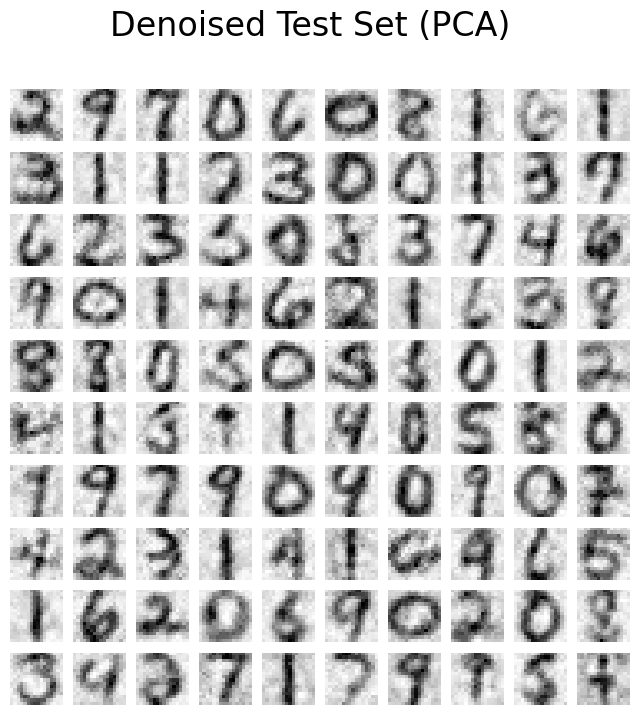

In [189]:
plot_digits(denoised_pca, "Denoised Test Set (PCA)")

In [190]:
kernel_pca = KernelPCA(n_components=40, kernel="rbf", gamma=0.01, fit_inverse_transform=True, alpha=0.1)

In [191]:
kernel_pca.fit(train_noisy)

KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=0.01, kernel='rbf',
          n_components=40)

In [192]:
X_hat_kpca = kernel_pca.inverse_transform(kernel_pca.transform(test_noisy))

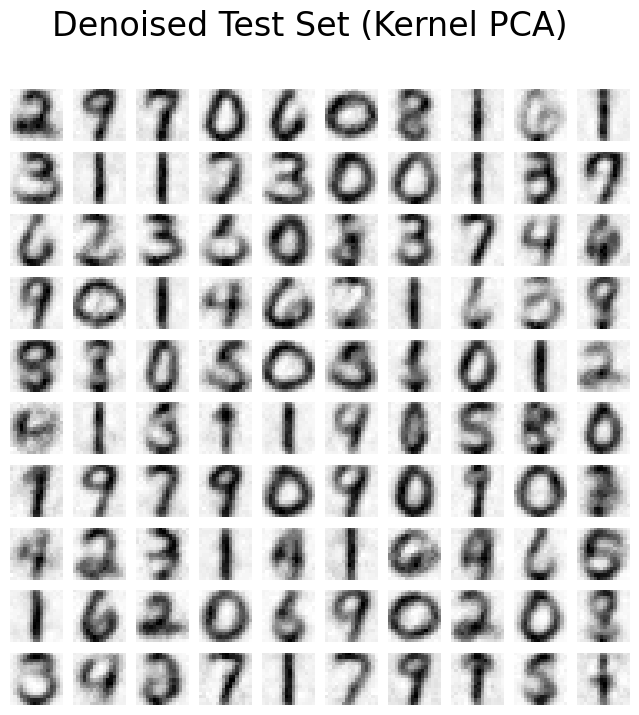

In [193]:
plot_digits(X_hat_kpca, "Denoised Test Set (Kernel PCA)")